In [1]:
# 必要ライブラリの導入

!pip install japanize_matplotlib | tail -n 1
!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

In [2]:
# 必要ライブラリのインポート

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.display import display

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchviz import make_dot

In [4]:
# デフォルトフォントサイズ変更
plt.rcParams['font.size'] = 14

# デフォルトグラフサイズ変更
plt.rcParams['figure.figsize'] = (6,6)

# デフォルトで方眼表示ON
plt.rcParams['axes.grid'] = True

# numpyの浮動小数点の表示精度
np.set_printoptions(suppress=True, precision=4)

## 5.3 線形関数(nn.Linear)

###  入力:1 出力:1 の線形関数

In [5]:
# 乱数の種固定
torch.manual_seed(123)

# 入力:1 出力:1 の線形関数の定義
l1 = nn.Linear(1, 1)

# 線形関数の表示
print(l1)

Linear(in_features=1, out_features=1, bias=True)


In [6]:
# パラメータ名、パラメータ値、shapeの表示

for param in l1.named_parameters():
    print('name: ', param[0])
    print('tensor: ', param[1])
    print('shape: ', param[1].shape)

name:  weight
tensor:  Parameter containing:
tensor([[-0.4078]], requires_grad=True)
shape:  torch.Size([1, 1])
name:  bias
tensor:  Parameter containing:
tensor([0.0331], requires_grad=True)
shape:  torch.Size([1])


In [7]:
# 初期値設定
nn.init.constant_(l1.weight, 2.0)
nn.init.constant_(l1.bias, 1.0)

# 結果確認
print(l1.weight)
print(l1.bias)

Parameter containing:
tensor([[2.]], requires_grad=True)
Parameter containing:
tensor([1.], requires_grad=True)


In [8]:
# テスト用データ生成

# x_npをnumpy配列で定義
x_np = np.arange(-2, 2.1, 1)

# Tensor化
x = torch.tensor(x_np).float()

# サイズを(N,1)に変更
x = x.view(-1,1)

# 結果確認
print(x.shape)
print(x)

torch.Size([5, 1])
tensor([[-2.],
        [-1.],
        [ 0.],
        [ 1.],
        [ 2.]])


In [9]:
# 1次関数のテスト

y = l1(x)

print(y.shape)
print(y.data)

torch.Size([5, 1])
tensor([[-3.],
        [-1.],
        [ 1.],
        [ 3.],
        [ 5.]])


### 入力:2 出力:1 の線形関数

In [13]:
# 入力:2 出力:1 の線形関数の定義
l2 = nn.Linear(2, 1)

# 初期値設定
nn.init.constant_(l2.weight, 1.0)
nn.init.constant_(l2.bias, 2.0)

# 結果確認
print(l2.weight)
print(l2.bias)

Parameter containing:
tensor([[1., 1.]], requires_grad=True)
Parameter containing:
tensor([2.], requires_grad=True)


In [14]:
# 2次元numpy配列
x2_np = np.array([[0, 0], [0, 1], [1, 0], [1,1]])

# Tensor化
x2 =  torch.tensor(x2_np).float()

# 結果確認
print(x2.shape)
print(x2)

torch.Size([4, 2])
tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])


In [15]:
# 関数値計算
y2 = l2(x2)

# shape確認
print(y2.shape)

# 値確認
print(y2.data)

torch.Size([4, 1])
tensor([[2.],
        [3.],
        [3.],
        [4.]])


### 入力:2 出力:3 の線形関数

In [16]:
# 入力:2 出力:3 の線形関数の定義

l3 = nn.Linear(2, 3)

# 初期値設定
nn.init.constant_(l3.weight[0,:], 1.0)
nn.init.constant_(l3.weight[1,:], 2.0)
nn.init.constant_(l3.weight[2,:], 3.0)
nn.init.constant_(l3.bias, 2.0)

# 結果確認
print(l3.weight)
print(l3.bias)

Parameter containing:
tensor([[1., 1.],
        [2., 2.],
        [3., 3.]], requires_grad=True)
Parameter containing:
tensor([2., 2., 2.], requires_grad=True)


In [17]:
# 関数値計算
y3 = l3(x2)

# shape確認
print(y3.shape)

# 値確認
print(y3.data)

torch.Size([4, 3])
tensor([[2., 2., 2.],
        [3., 4., 5.],
        [3., 4., 5.],
        [4., 6., 8.]])


## 5.4 カスタムクラスを利用したモデル定義

In [18]:
# モデルのクラス定義

class Net(nn.Module):
    def __init__(self, n_input, n_output):
        #  親クラスnn.Modulesの初期化呼び出し
        super().__init__()

        # 出力層の定義
        self.l1 = nn.Linear(n_input, n_output)   
        
    # 予測関数の定義
    def forward(self, x):
        x1 = self.l1(x) # 線形回帰
        return x1

In [19]:
# ダミー入力
inputs = torch.ones(100,1)

# インスタンスの生成 (１入力1出力の線形モデル)
n_input = 1
n_output = 1
net = Net(n_input, n_output)

# 予測
outputs = net(inputs)


## 5.6 データ準備
UCI公開データセットのうち、回帰でよく使われる「ボストン・データセット」を用いる。  

https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

CRIM： 町別の「犯罪率」

ZN： 25,000平方フィートを超える区画に分類される住宅地の割合＝「広い家の割合」

INDUS： 町別の「非小売業の割合」

CHAS： チャールズ川のダミー変数（区画が川に接している場合は1、そうでない場合は0）＝「川の隣か」

NOX： 「NOx濃度（0.1ppm単位）」＝一酸化窒素濃度（parts per 10 million単位）。この項目を目的変数とする場合もある

RM： 1戸当たりの「平均部屋数」

AGE： 1940年より前に建てられた持ち家の割合＝「古い家の割合」

DIS： 5つあるボストン雇用センターまでの加重距離＝「主要施設への距離」

RAD： 「主要高速道路へのアクセス性」の指数

TAX： 10,000ドル当たりの「固定資産税率」

PTRATIO： 町別の「生徒と先生の比率」

B： 「1000(Bk - 0.63)」の二乗値。Bk＝「町ごとの黒人の割合」を指す

LSTAT： 「低所得者人口の割合」

MEDV：「住宅価格」（1000ドル単位）の中央値。通常はこの数値が目的変数として使われる

In [20]:
# 「ボストン・データセット」はscikit-learnのライブラリでも取得できるが、
# その場合、将来版で利用できなくなる予定のため、別Webサイトから取得する
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", 
    skiprows=22, header=None)
x_org = np.hstack([raw_df.values[::2, :], 
    raw_df.values[1::2, :2]])
yt = raw_df.values[1::2, 2]
feature_names = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
    'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B', 'LSTAT'])

# 結果確認
print('元データ', x_org.shape, yt.shape)
print('項目名: ', feature_names)

元データ (506, 13) (506,)
項目名:  ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [21]:
# データ絞り込み (項目 RMのみ)
x = x_org[:,feature_names == 'RM']
print('絞り込み後', x.shape)
print(x[:5,:])

# 正解データ yの表示
print('正解データ')
print(yt[:5])

絞り込み後 (506, 1)
[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]]
正解データ
[24.  21.6 34.7 33.4 36.2]


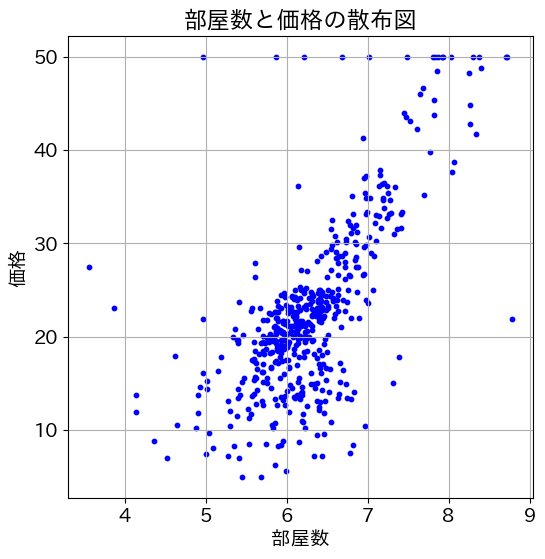

In [22]:
# 散布図の表示

plt.scatter(x, yt, s=10, c='b')
plt.xlabel('部屋数')
plt.ylabel('価格')
plt.title('部屋数と価格の散布図')
plt.show()

## 5.7 モデル定義

In [23]:
# 変数定義

# 入力次元数
n_input= x.shape[1]

# 出力次元数
n_output = 1

print(f'入力次元数: {n_input}  出力次元数: {n_output}')

入力次元数: 1  出力次元数: 1


In [24]:
# 機械学習モデル（予測モデル）クラス定義

class Net(nn.Module):
    def __init__(self, n_input, n_output):
        #  親クラスnn.Modulesの初期化呼び出し
        super().__init__()

        # 出力層の定義
        self.l1 = nn.Linear(n_input, n_output)   
        
        # 初期値を全部1にする
        # 「ディープラーニングの数学」と条件を合わせる目的
        nn.init.constant_(self.l1.weight, 1.0)
        nn.init.constant_(self.l1.bias, 1.0)

    # 予測関数の定義
    def forward(self, x):
        x1 = self.l1(x) # 線形回帰
        return x1

In [25]:
# インスタンスの生成
# １入力1出力の線形モデル

net = Net(n_input, n_output)

# モデル内のパラメータの確認
# モデル内の変数取得にはnamed_parameters関数を利用する
# 結果の第1要素が名前、第2要素が値
# 
# predict.weightとpredict.biasがあることがわかる
# 初期値はどちらも1.0になっている

for parameter in net.named_parameters():
    print(f'変数名: {parameter[0]}')
    print(f'変数値: {parameter[1].data}')

変数名: l1.weight
変数値: tensor([[1.]])
変数名: l1.bias
変数値: tensor([1.])


In [26]:
# パラメータのリスト取得にはparameters関数を利用する

for parameter in net.parameters():
    print(parameter)

Parameter containing:
tensor([[1.]], requires_grad=True)
Parameter containing:
tensor([1.], requires_grad=True)


### モデル確認

In [27]:
# モデルの概要表示

print(net)

Net(
  (l1): Linear(in_features=1, out_features=1, bias=True)
)


In [28]:
# モデルのサマリー表示

from torchinfo import summary
summary(net, (1,))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1]                       --
├─Linear: 1-1                            [1]                       2
Total params: 2
Trainable params: 2
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

### 損失関数と最適化関数

In [29]:
# 損失関数： 平均2乗誤差
criterion = nn.MSELoss()

# 学習率
lr = 0.01

# 最適化関数: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)


## 5.8 勾配降下法

In [30]:
# 入力変数x と正解値 ytのテンソル変数化

inputs = torch.tensor(x).float()
labels = torch.tensor(yt).float()

# 次元数確認

print(inputs.shape)
print(labels.shape)

torch.Size([506, 1])
torch.Size([506])


In [31]:
# 損失値計算用にlabels変数を(N,1)次元の行列に変換する

labels1 = labels.view((-1, 1))

# 次元数確認
print(labels1.shape)

torch.Size([506, 1])


In [32]:
# 予測計算

outputs = net(inputs)

In [33]:

#  損失計算
loss = criterion(outputs, labels1)

# 損失値の取得
print(f'{loss.item():.5f}')

308.44986


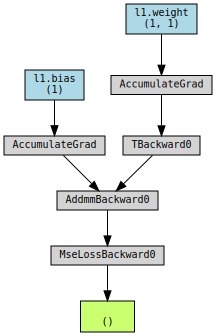

In [34]:

# 損失の計算グラフ可視化

g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

In [35]:
# 予測計算
outputs = net(inputs)

#  損失計算
loss = criterion(outputs, labels1)

# 勾配計算
loss.backward()

# 勾配の結果が取得可能に
print(net.l1.weight.grad)
print(net.l1.bias.grad)

tensor([[-199.6421]])
tensor([-30.4963])


In [36]:
# パラメータ修正
optimizer.step()

# パラメータ値が変わる
print(net.l1.weight)
print(net.l1.bias)

Parameter containing:
tensor([[2.9964]], requires_grad=True)
Parameter containing:
tensor([1.3050], requires_grad=True)


In [37]:
# 勾配値の初期化
optimizer.zero_grad()

# 勾配値がすべてゼロになっている
print(net.l1.weight.grad)
print(net.l1.bias.grad)

None
None


### 繰り返し計算

In [38]:
# 学習率
lr = 0.01

# インスタンス生成　(パラメータ値初期化)
net = Net(n_input, n_output)

# 損失関数： 平均2乗誤差
criterion = nn.MSELoss()

# 最適化関数: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 繰り返し回数
num_epochs = 50000

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2))

In [39]:
# 繰り返し計算メインループ

for epoch in range(num_epochs):
    
    # 勾配値初期化
    optimizer.zero_grad()

    # 予測計算
    outputs = net(inputs)
  
    # 損失計算
    # 「ディープラーニングの数学」に合わせて2で割った値を損失とした
    loss = criterion(outputs, labels1) / 2.0

    # 勾配計算
    loss.backward()

    # パラメータ修正
    optimizer.step()

    # 100回ごとに途中経過を記録する
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 154.22493
Epoch 100 loss: 29.61752
Epoch 200 loss: 29.43177
Epoch 300 loss: 29.25043
Epoch 400 loss: 29.07340
Epoch 500 loss: 28.90057
Epoch 600 loss: 28.73186
Epoch 700 loss: 28.56715
Epoch 800 loss: 28.40636
Epoch 900 loss: 28.24939
Epoch 1000 loss: 28.09615
Epoch 1100 loss: 27.94655
Epoch 1200 loss: 27.80050
Epoch 1300 loss: 27.65792
Epoch 1400 loss: 27.51873
Epoch 1500 loss: 27.38285
Epoch 1600 loss: 27.25020
Epoch 1700 loss: 27.12070
Epoch 1800 loss: 26.99428
Epoch 1900 loss: 26.87086
Epoch 2000 loss: 26.75037
Epoch 2100 loss: 26.63275
Epoch 2200 loss: 26.51792
Epoch 2300 loss: 26.40582
Epoch 2400 loss: 26.29639
Epoch 2500 loss: 26.18955
Epoch 2600 loss: 26.08525
Epoch 2700 loss: 25.98343
Epoch 2800 loss: 25.88404
Epoch 2900 loss: 25.78700
Epoch 3000 loss: 25.69226
Epoch 3100 loss: 25.59978
Epoch 3200 loss: 25.50950
Epoch 3300 loss: 25.42136
Epoch 3400 loss: 25.33532
Epoch 3500 loss: 25.25132
Epoch 3600 loss: 25.16932
Epoch 3700 loss: 25.08927
Epoch 3800 loss: 25.011

## 5.9 結果確認

損失初期値: 154.22493
損失最終値: 21.80033


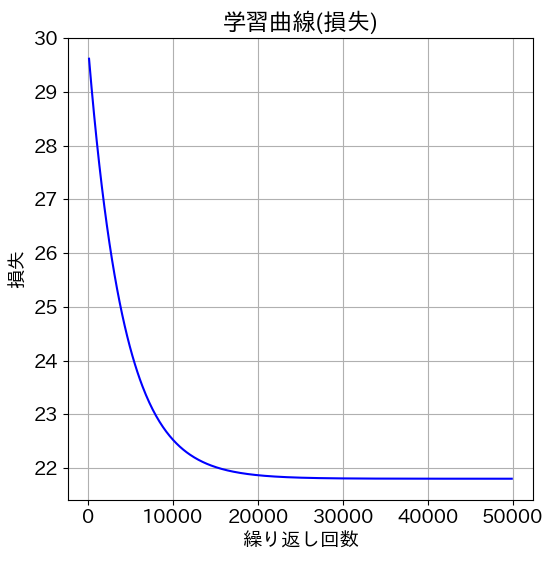

In [40]:
# 損失初期値と最終値

print(f'損失初期値: {history[0,1]:.5f}')
print(f'損失最終値: {history[-1,1]:.5f}')

# 学習曲線の表示 (損失) 
# 最初の1つを除く

plt.plot(history[1:,0], history[1:,1], 'b')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.show()

In [41]:
# 回帰直線の算出

# xの最小値、最大値
xse = np.array((x.min(), x.max())).reshape(-1,1)
Xse = torch.tensor(xse).float()

with torch.no_grad():
  Yse = net(Xse)

print(Yse.numpy())

[[-2.2189]
 [45.2121]]


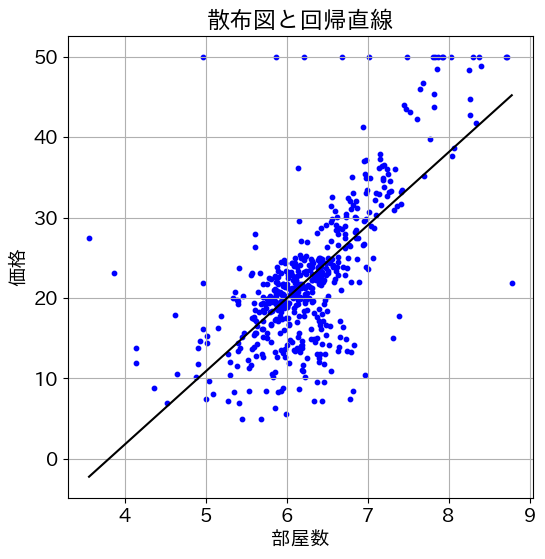

In [42]:
# 散布図と回帰直線の描画

plt.scatter(x, yt, s=10, c='b')
plt.xlabel('部屋数')
plt.ylabel('価格')
plt.plot(Xse.data, Yse.data, c='k')
plt.title('散布図と回帰直線')
plt.show()

##別の例(LSTAT)
「低所得者人口の割合」


In [61]:
# データ絞り込み (項目 []のみ)
x = x_org[:,feature_names == 'AGE']
print('絞り込み後', x.shape)
print(x[:5,:])

# 正解データ yの表示
print('正解データ')
print(yt[:5])

絞り込み後 (506, 1)
[[65.2]
 [78.9]
 [61.1]
 [45.8]
 [54.2]]
正解データ
[24.  21.6 34.7 33.4 36.2]


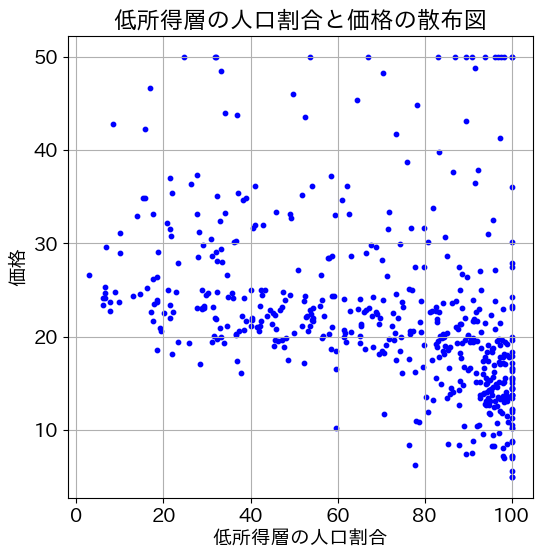

In [62]:
# 散布図の表示

plt.scatter(x, yt, s=10, c='b')
plt.xlabel('低所得層の人口割合')
plt.ylabel('価格')
plt.title('低所得層の人口割合と価格の散布図')
plt.show()

In [63]:
# 機械学習モデル（予測モデル）クラス定義

class Net(nn.Module):
    def __init__(self, n_input, n_output):
        #  親クラスnn.Modulesの初期化呼び出し
        super().__init__()

        # 出力層の定義
        self.l1 = nn.Linear(n_input, n_output)   
        
        # 初期値を全部1にする
        nn.init.constant_(self.l1.weight, -1.0)
        nn.init.constant_(self.l1.bias, 1.0)

    # 予測関数の定義
    def forward(self, x):
        x1 = self.l1(x) # 線形回帰
        return x1

In [64]:
# インスタンスの生成
# １入力1出力の線形モデル

net = Net(n_input, n_output)

In [65]:
# 学習率
lr = 0.01

# インスタンス生成　(パラメータ値初期化)
net = Net(n_input, n_output)

# 損失関数： 平均2乗誤差
criterion = nn.MSELoss()

# 最適化関数: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 繰り返し回数
num_epochs = 50000

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2))

In [66]:
# 繰り返し計算メインループ

for epoch in range(num_epochs):
    
    # 勾配値初期化
    optimizer.zero_grad()

    # 予測計算
    outputs = net(inputs)
  
    # 損失計算
    # 「ディープラーニングの数学」に合わせて2で割った値を損失とした
    loss = criterion(outputs, labels1) / 2.0

    # 勾配計算
    loss.backward()

    # パラメータ修正
    optimizer.step()

    # 100回ごとに途中経過を記録する
    if ( epoch % 10000 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 433.84570
Epoch 10000 loss: 22.53554
Epoch 20000 loss: 21.86666
Epoch 30000 loss: 21.80627
Epoch 40000 loss: 21.80082


損失初期値: 433.84570
損失最終値: 21.80082


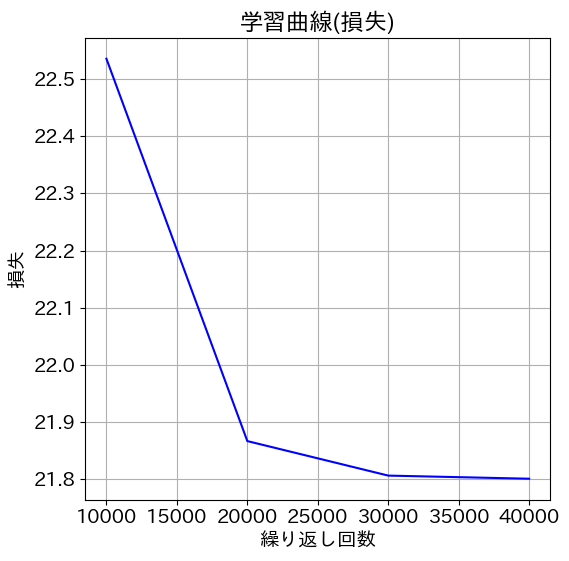

In [67]:
# 損失初期値と最終値

print(f'損失初期値: {history[0,1]:.5f}')
print(f'損失最終値: {history[-1,1]:.5f}')

# 学習曲線の表示 (損失) 
# 最初の1つを除く

plt.plot(history[1:,0], history[1:,1], 'b')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.show()

In [68]:
# 回帰直線の算出

# xの最小値、最大値
xse = np.array((x.min(), x.max())).reshape(-1,1)
Xse = torch.tensor(xse).float()

with torch.no_grad():
  Yse = net(Xse)

print(Yse.numpy())

[[ -8.2257]
 [874.2194]]


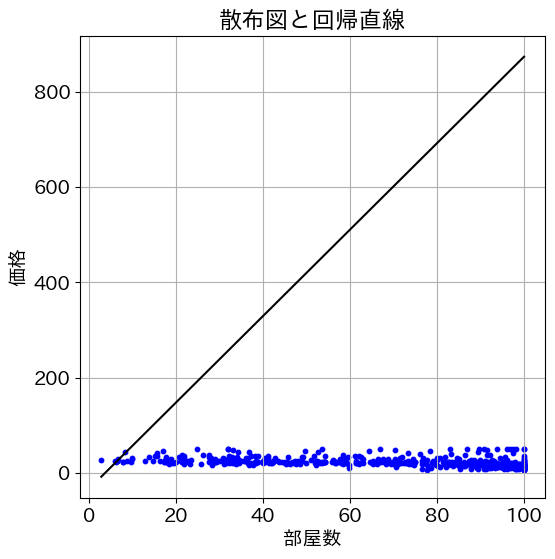

In [69]:
# 散布図と回帰直線の描画

plt.scatter(x, yt, s=10, c='b')
plt.xlabel('部屋数')
plt.ylabel('価格')
plt.plot(Xse.data, Yse.data, c='k')
plt.title('散布図と回帰直線')
plt.show()

## 5.10 重回帰モデルへの拡張

In [80]:
# データ絞り込み (項目 RMのみ)
x = x_org[:,feature_names == 'RM']
print('絞り込み後', x.shape)
print(x[:5,:])

# 正解データ yの表示
print('正解データ')
print(yt[:5])

絞り込み後 (506, 1)
[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]]
正解データ
[24.  21.6 34.7 33.4 36.2]


In [81]:
# 列(LSTAT: 低所得者率)の追加

x_add = x_org[:,feature_names == 'LSTAT']
x2 = np.hstack((x, x_add))

# shapeの表示
print(x2.shape)

# 入力データxの表示
print(x2[:5,:])

(506, 2)
[[6.575 4.98 ]
 [6.421 9.14 ]
 [7.185 4.03 ]
 [6.998 2.94 ]
 [7.147 5.33 ]]


In [82]:
# 今度は入力次元数=2

n_input = x2.shape[1]
print(n_input)

# モデルインスタンスの生成
net = Net(n_input, n_output)

2


In [83]:
# モデル内のパラメータの確認
# predict.weight が2次元に変わった

for parameter in net.named_parameters():
    print(f'変数名: {parameter[0]}')
    print(f'変数値: {parameter[1].data}')

変数名: l1.weight
変数値: tensor([[-1., -1.]])
変数名: l1.bias
変数値: tensor([1.])


In [84]:
# モデルの概要表示

print(net)

Net(
  (l1): Linear(in_features=2, out_features=1, bias=True)
)


In [85]:
# モデルのサマリー表示

from torchinfo import summary
summary(net, (2,))

Layer (type:depth-idx)                   Output Shape              Param #
Net                                      [1]                       --
├─Linear: 1-1                            [1]                       3
Total params: 3
Trainable params: 3
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [86]:
# 入力変数x2 のテンソル変数化 
# labels, labels1は前のものをそのまま利用

inputs = torch.tensor(x2).float()

In [87]:
# 初期化処理

# 学習率
lr = 0.001

# インスタンス生成　(パラメータ値初期化)
net = Net(n_input, n_output)

# 損失関数： 平均2乗誤差
criterion = nn.MSELoss()

# 最適化関数: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 繰り返し回数
num_epochs = 2000

# 評価結果記録用 (損失関数値のみ記録)
history = np.zeros((0,2))

In [88]:
# 繰り返し計算メインループ

for epoch in range(num_epochs):
    
    # 勾配値初期化
    optimizer.zero_grad()

    # 予測計算
    outputs = net(inputs)
  
    # 誤差計算
    # 「ディープラーニングの数学」に合わせて2で割った値を損失とした
    loss = criterion(outputs, labels1) / 2.0

    # 勾配計算
    loss.backward()

    # パラメータ修正
    optimizer.step()

    # 100回ごとに途中経過を記録する
    if ( epoch % 100 == 0):
        history = np.vstack((history, np.array([epoch, loss.item()])))
        print(f'Epoch {epoch} loss: {loss.item():.5f}')

Epoch 0 loss: 839.89307
Epoch 100 loss: 31.68885
Epoch 200 loss: 17.09310
Epoch 300 loss: 15.48502
Epoch 400 loss: 15.30782
Epoch 500 loss: 15.28827
Epoch 600 loss: 15.28609
Epoch 700 loss: 15.28581
Epoch 800 loss: 15.28575
Epoch 900 loss: 15.28571
Epoch 1000 loss: 15.28568
Epoch 1100 loss: 15.28565
Epoch 1200 loss: 15.28561
Epoch 1300 loss: 15.28557
Epoch 1400 loss: 15.28554
Epoch 1500 loss: 15.28551
Epoch 1600 loss: 15.28547
Epoch 1700 loss: 15.28544
Epoch 1800 loss: 15.28540
Epoch 1900 loss: 15.28537


In [89]:
# 損失初期値、最終値

print(f'損失初期値: {history[0,1]:.5f}')
print(f'損失最終値: {history[-1,1]:.5f}')

損失初期値: 839.89307
損失最終値: 15.28537


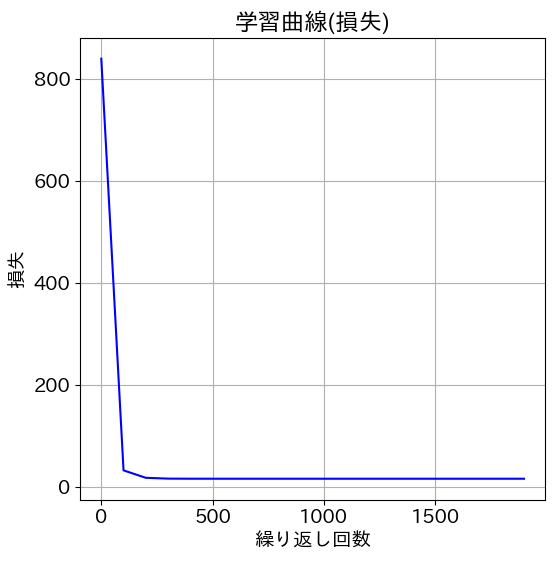

In [90]:
# 学習曲線の表示 (損失)

plt.plot(history[:,0], history[:,1], 'b')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.show()